 # 텍스트 데이터 다루기
 - 텍스트(단어 또는 문자의 시퀀스)
 - 시퀀스 데이터를 처리하는 기본적인 딥러닝 모델 : RNN(순환 신경망),CNN(1d cnn)
 -  텍스트 벡터화 : 텍스트를 문장이나 단어로 나누고 하나의 벡터로 변환
 - 텍스트에서 문장이나 단어의 n-gram을 추출하여, 각 n-gram을 하나의 벡터로 변환
     - n-gram : 문장에서 추출한 n개(또는 그이하)의 연속된 단어 그룹
     - ex) "The cat sat on the mat" -> 2-gram : {'The', 'The cat','cat','cat at','sat','sat on','on','on the','the','the mat','mat'}
     - 예제와 같은 것을 2-gram 가방 (bag of 2-gram)이라고 한다. 
     - BoW(Bag-of-Words): 각 샘플을 어휘 사전 크기의 벡터로 변환, 순서가 없다. 이런 토큰화 방법은 로지스틱 회귀, 랜덤 포레스트 같은 얕은 학습 방법의 텍스트 처리 모델을 사용할때 강력한 방법!!!!
     
    <br>
 - Token : 텍스트를 나누는 이런 단위(단어,문자,n-gram)
 - Tokenization : 텍스트를 토큰으로 나누는 작업
     - ## 모든 벡터화 과정은 어떤 종류의 토큰화를 적용하고, 생성된 토큰에 수치형 벡터를 연결하는 것으로 이루어짐.
 -> Token과 Vector를 연결하는 방법  
     1. one-hot-encoding
     2. token embedding(일반적으로 단어에 대해 사용되므로 word embedding이라고 함)

# 1. sparse - one-hot-encoding

In [47]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 가장 빈도가 높은 1000개 단어만 선택하도록 Tokenizer 객체를 만든다.
tokenizer.fit_on_texts(samples) # 단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 열로 구축한다.

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') 
print(one_hot_results)
word_index = tokenizer.word_index
print(word_index)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


# 2. Dense - word embedding
원핫인코딩으로 얻은 표현은 sparse하고 고차원이지만,  
단어임베딩으로 얻은 표현은 dense하고 비교적 저차원이며 데이터로부터 학습된다!
<br>
* Word Embedding
- Sparse representation (희소 표현) (0/1)  
    희소 표현의 한 가지 방법 - one-hot-encoding 표현  
    but, 단어집합 커질수록, 단어 vector dim증가, 단어 백터 네 실질적 표현값은 인덱스하나값이고, 나머지는 다 0이므로 sparse하다고함.
    이렇게 단어 표현할 경우, 단어 vector를 통해 단어 간의 유사도,관계 알아낼 수 x
- Dense representation  (밀집 표현) (실수)
    단어 vector dim이 기하급수적 증가를 막기 위해.
    밀집 표현에서 단어 vector dim은 단어 벡터의 크기가 아니다.
    사용자가 설정한 값으로 특정 차원 단어 표현
    단어 벡터 내의 값은 실수값 가짐 (임베딩)
    0,1x
<br>

ex) embedding 층에 (32,10)크기가 들어온다 : 길이가 10인 시퀀스32개로 이루어진 것 (토큰개수samples, sequence_length즉 임베딩차원)  
- embedding층에 2D input이 들어오고, 3D output이 나옴
- input : 2D (samples,sequence_length)
- output : 3D (samples, sequence_length, embedding_dimensionality)

In [9]:
from keras.layers import Embedding

embedding_layer = Embedding(1000,64) 

In [48]:
# embedding층에 사용할 IMDB 데이터 로드하기 (영화 리뷰 감성 예측)
from keras.datasets import imdb 
from tensorflow.keras import preprocessing 
#from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 20 #사용할 텍스트 길이 -> max_features에서 가장 빈법ㄴ한 maxlen의개수만큼 쓰겟지

print('데이터 로드중...!\n')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print('훈련데이터', x_train.shape)
print('검증데이터', x_test.shape)

print('\n','sequence padding 후!')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print('훈련데이터', x_train.shape)
print('검증데이터', x_test.shape)

데이터 로드중...!

훈련데이터 (25000,)
검증데이터 (25000,)

 sequence padding 후!
훈련데이터 (25000, 20)
검증데이터 (25000, 20)


In [50]:
# imdb 데이터에 embedding층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000,8, input_length=maxlen))
model.add(Flatten()) # 3D tensor를 2D tensor로 펼치기 (samples, maxlenx8)
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 20, 8)             80000     
                                                                 
 flatten_4 (Flatten)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
614/625 [============================>.] - ETA: 0s - loss: 0.6665 - accuracy: 0.6257WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F35E577EE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

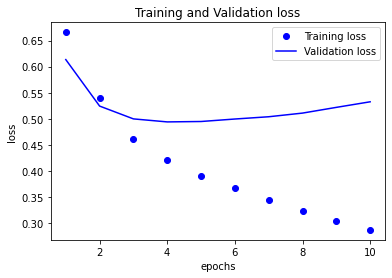

In [52]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

검증 데이터 손실에 비해, 훈련 데이터의 손실은 계속해서 줄어든다.

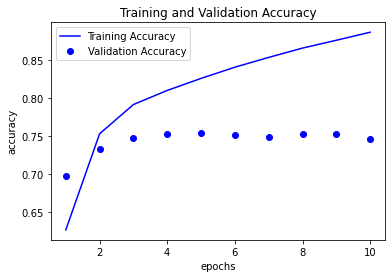

In [53]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

훈련데이터의 정확도는 계속 올라가는 반면, 검증데이터의 정확도는 epoch=4정도부터 변하지 않는다.  
-> 새로운 데이터에 대해서도 성능이 좋지 않을 수 있다.  
-> overfitting  
- overfitting 방지하려면?
        - 훈련 데이터 더 모으기
        - 네트워크 수 줄이기(은닉층..이런거)
        - 가중치 규제 ( L1-norm: 가중치의 절댓값에 비례하는 비용 추가, L2-norm : 가중치의 제곱에 비례하는 비용 추가
        - Dropout 추가 : 무작위로 일부 특성 제거 (0으로만들어주기)